In [ ]:
# here today, gone tomorrow, temporary...
# why this is gonna be temporary?

In [4]:
import requests
import zipfile
import io
import os
import geopandas as gpd

In [6]:
# calling data

def getData():
    url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

    response = requests.get(url)

    # data 폴더 생성 
    if not os.path.exists('data'):
        os.makedirs('data')

    # 압축 파일을 data폴더에서 해제
    z = zipfile.ZipFile(io.BytesIO(response.content))
    z.extractall('data')

    # 데이터 읽기
    world = gpd.read_file('data/ne_110m_admin_0_countries.shp')

    return world

In [9]:
world = getData()
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


# Data EDA

In [10]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [11]:
world.shape

(177, 169)

In [15]:
print(world.columns.tolist())

['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD

In [16]:
world.dtypes

featurecla      object
scalerank        int32
LABELRANK        int32
SOVEREIGNT      object
SOV_A3          object
                ...   
FCLASS_NL       object
FCLASS_SE       object
FCLASS_BD       object
FCLASS_UA       object
geometry      geometry
Length: 169, dtype: object

In [17]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [18]:
# 결측치 확인

world.isnull().sum()

featurecla      0
scalerank       0
LABELRANK       0
SOVEREIGNT      0
SOV_A3          0
             ... 
FCLASS_NL     173
FCLASS_SE     174
FCLASS_BD     171
FCLASS_UA     174
geometry        0
Length: 169, dtype: int64

In [19]:
# 기본통계량

world.describe()

,scalerank,LABELRANK,ADM0_DIF,LEVEL,GEOU_DIF,SU_DIF,BRK_DIFF,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,WOE_ID,WOE_ID_EH,ADM0_A3_UN,ADM0_A3_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID
count,177.000000,177.000000,177.000000,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,1.770000e+02,177.000000,177.000000,1.770000e+02,177.000000,1.770000e+02,1.770000e+02,177.0,177.0,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,1.770000e+02
mean,1.011299,3.711864,0.101695,1.988701,0.0,0.011299,0.016949,3.231638,3.485876,3.796610,5.734463,4.324346e+07,13.474576,2018.932203,4.934739e+05,2018.559322,2.163554e+07,2.323841e+07,-99.0,-99.0,8.129944,8.960452,4.734463,-93.231638,-2.389831,0.088701,3.291525,8.148588,22.017317,19.318850,1.159321e+09
std,0.150329,1.353248,0.303104,0.105996,0.0,0.105996,0.129447,1.718057,1.886276,2.103404,8.677466,1.513543e+08,2.330791,0.517788,2.019326e+06,1.576870,6.395021e+06,2.633247e+06,0.0,0.0,3.367636,4.834020,1.124418,23.641439,18.148081,0.697794,1.010786,1.105210,59.970759,26.538967,3.381290e+02
min,1.000000,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,-99.000000,1.400000e+02,1.000000,2014.000000,1.600000e+01,2007.000000,-9.900000e+01,-9.900000e+01,-99.0,-99.0,4.000000,4.000000,3.000000,-99.000000,-99.000000,0.000000,1.700000,5.200000,-102.289448,-79.843222,1.159320e+09
25%,1.000000,3.000000,0.000000,2.000000,0.0,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,3.301000e+06,12.000000,2019.000000,1.346900e+04,2019.000000,2.342478e+07,2.342480e+07,-99.0,-99.0,6.000000,6.000000,4.000000,-99.000000,1.000000,0.000000,2.700000,7.000000,-3.464718,4.448298,1.159321e+09
50%,1.000000,3.000000,0.000000,2.000000,0.0,0.000000,0.000000,3.000000,3.000000,3.000000,6.000000,1.019232e+07,14.000000,2019.000000,5.040000e+04,2019.000000,2.342485e+07,2.342487e+07,-99.0,-99.0,7.000000,7.000000,4.000000,-99.000000,1.000000,0.000000,3.000000,8.000000,23.458829,19.587062,1.159321e+09
75%,1.000000,5.000000,0.000000,2.000000,0.0,0.000000,0.000000,5.000000,5.000000,5.000000,9.000000,3.182530e+07,15.000000,2019.000000,2.619210e+05,2019.000000,2.342492e+07,2.342494e+07,-99.0,-99.0,10.000000,10.000000,5.000000,-99.000000,1.000000,0.000000,4.000000,9.000000,45.874383,40.402387,1.159321e+09
max,3.000000,7.000000,1.000000,2.000000,0.0,1.000000,1.000000,7.000000,8.000000,9.000000,13.000000,1.397715e+09,18.000000,2020.000000,2.143323e+07,2019.000000,2.828941e+07,2.938920e+07,-99.0,-99.0,24.000000,35.000000,10.000000,5.000000,1.000000,7.000000,6.000000,11.000000,177.975427,74.319387,1.159321e+09


# Geometry 칼럼 확인

In [20]:
type(world.geometry)

geopandas.geoseries.GeoSeries

In [21]:
# 면적 계산 - 단위는 km^2
world.geometry.area

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_27536\3258742200.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world.geometry.area


0         1.639511
1        76.301964
2         8.603984
3      1712.995228
4      1122.281921
          ...     
172       8.604719
173       1.479321
174       1.231641
175       0.639000
176      51.196106
Length: 177, dtype: float64

In [23]:
# 면적 계산 - 단위는 km^2

world['area_km2'] = world.geometry.area
world.head(1)

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_27536\799034420.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['area_km2'] = world.geometry.area


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,area_km2
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",1.639511


In [25]:
# 가장 큰 면적의 5개 국가

world.nlargest(5, 'area_km2')[['NAME', 'area_km2']]

,NAME,area_km2
159,Antarctica,6028.836194
18,Russia,2935.205205
3,Canada,1712.995228
4,United States of America,1122.281921
139,China,954.635341


In [26]:
# 대륙별 국가 수 확인

world['CONTINENT'].value_counts()

CONTINENT
Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

# 시각화

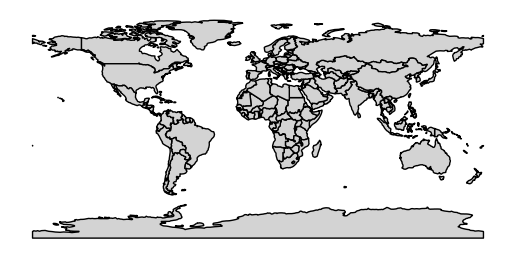

In [27]:
# 시각화

import matplotlib.pyplot as plt

fix, ax = plt.subplots()
world.plot(ax = ax, color = 'lightgrey', edgecolor = 'black')
plt.axis('off')
plt.show()

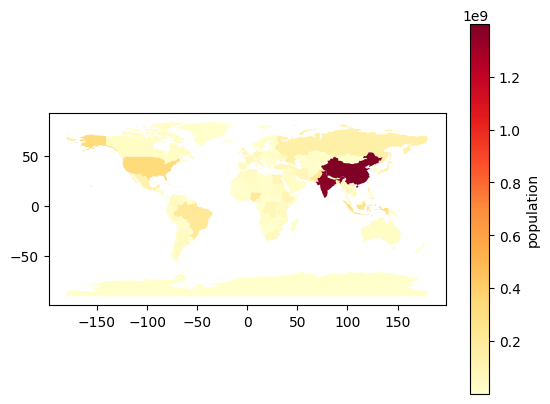

In [29]:
# 세계 인구 

fig, ax = plt.subplots()
world.plot(
    column = 'POP_EST',
    ax = ax,
    legend = True,
    legend_kwds = {'label': 'population'},
    cmap = 'YlOrRd'
)
plt.show()

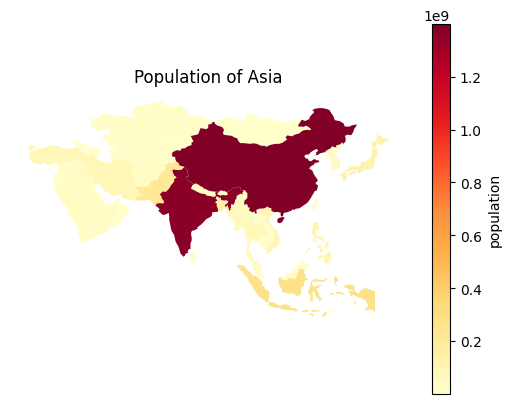

In [38]:
# 아시아 인구 시각화

fig, ax = plt.subplots()
world_asia = world[world['CONTINENT'] == 'Asia']
world_asia.plot(
    column = 'POP_EST',
    ax = ax,
    legend = True,
    legend_kwds = {'label': 'population'},
    cmap = 'YlOrRd',
)
plt.axis('off')
plt.title('Population of Asia')
plt.show()

In [39]:
# 인구밀도
# POP_EST / area_km2 (아까 만든 거) 으로 계산하면 된다.

world['POP_DENSITY'] = world['POP_EST'] / world['area_km2']

In [40]:
world.head(1)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,area_km2,POP_DENSITY
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",1.639511,542816.12153


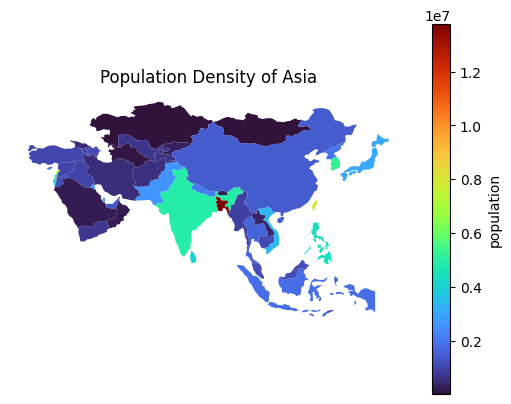

In [42]:
# 아시아 인구 밀도 시각화

fig, ax = plt.subplots()
world_asia = world[world['CONTINENT'] == 'Asia']
world_asia.plot(
    column = 'POP_DENSITY',
    ax = ax,
    legend = True,
    legend_kwds = {'label': 'population'},
    cmap = 'turbo',
)
plt.axis('off')
plt.title('Population Density of Asia')
plt.show()

# Shapely 라이브러리

- 점, 선, 다각형 등의 기하학적 객체 생성 및 조작

In [48]:
from shapely.geometry import Point, LineString, Polygon

# Point 생성
point = Point(0,0)
print(point)
print(type(point))

POINT (0 0)
<class 'shapely.geometry.point.Point'>


In [49]:
# LineString 객체 생성

line = LineString([(0,0), (1,1), (2,2)])
print(line)
print(type(line))

LINESTRING (0 0, 1 1, 2 2)
<class 'shapely.geometry.linestring.LineString'>


In [51]:
# Polygon 객체 생성
# 외부 링
exterior = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
# 내부 링 (구멍)
interior = [(1, 1), (1.5, 1), (1.5, 1.5), (1, 1.5), (1, 1)]
polygon = Polygon(exterior, [interior])
print(polygon)
print(type(polygon))

POLYGON ((0 0, 0 2, 2 2, 2 0, 0 0), (1 1, 1.5 1, 1.5 1.5, 1 1.5, 1 1))
<class 'shapely.geometry.polygon.Polygon'>


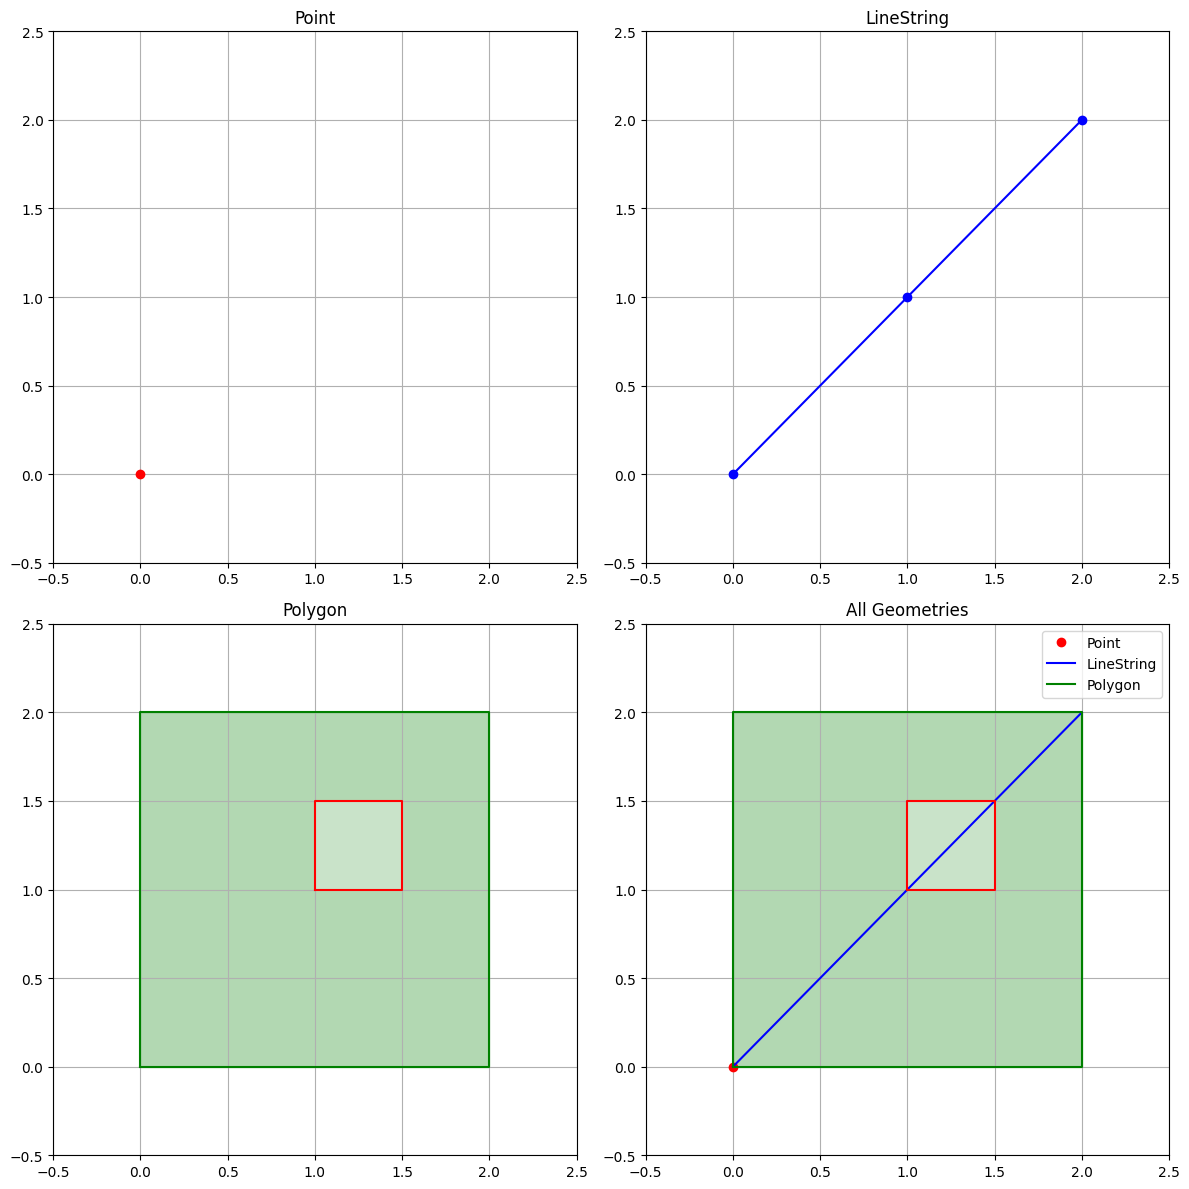

In [52]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

# Point 시각화
ax1.plot(point.x, point.y, 'ro')
ax1.set_title('Point')
ax1.grid(True)
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 2.5)

# LineString 시각화
x, y = line.xy
ax2.plot(x, y, 'b-')
ax2.plot(x, y, 'bo')  # 점도 표시
ax2.set_title('LineString')
ax2.grid(True)
ax2.set_xlim(-0.5, 2.5)
ax2.set_ylim(-0.5, 2.5)

# Polygon 시각화
x_ext, y_ext = zip(*exterior)
x_int, y_int = zip(*interior)

ax3.plot(x_ext, y_ext, 'g-')
ax3.fill(x_ext, y_ext, alpha=0.3, color='green')
ax3.plot(x_int, y_int, 'r-')
ax3.fill(x_int, y_int, alpha=0.3, color='white')
ax3.set_title('Polygon')
ax3.grid(True)
ax3.set_xlim(-0.5, 2.5)
ax3.set_ylim(-0.5, 2.5)

# 모든 객체 함께 시각화
ax4.plot(point.x, point.y, 'ro', label='Point')
ax4.plot(x, y, 'b-', label='LineString')
ax4.plot(x_ext, y_ext, 'g-', label='Polygon')
ax4.fill(x_ext, y_ext, alpha=0.3, color='green')
ax4.plot(x_int, y_int, 'r-')
ax4.fill(x_int, y_int, alpha=0.3, color='white')
ax4.set_title('All Geometries')
ax4.grid(True)
ax4.legend()
ax4.set_xlim(-0.5, 2.5)
ax4.set_ylim(-0.5, 2.5)

plt.tight_layout()
plt.show()

## 공간 연산

In [53]:
# 두 개의 사각형 폴리곤 생성
polygon1 = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])
polygon2 = Polygon([(1, 1), (3, 1), (3, 3), (1, 3)])

In [54]:
# 원본 polygon 시각화

x1, y1 = polygon1.exterior.xy
x2, y2 = polygon2.exterior.xy

print(x1, y1)
print(x2, y2)

array('d', [0.0, 2.0, 2.0, 0.0, 0.0]) array('d', [0.0, 0.0, 2.0, 2.0, 0.0])
array('d', [1.0, 3.0, 3.0, 1.0, 1.0]) array('d', [1.0, 1.0, 3.0, 3.0, 1.0])


(-0.5, 3.5)

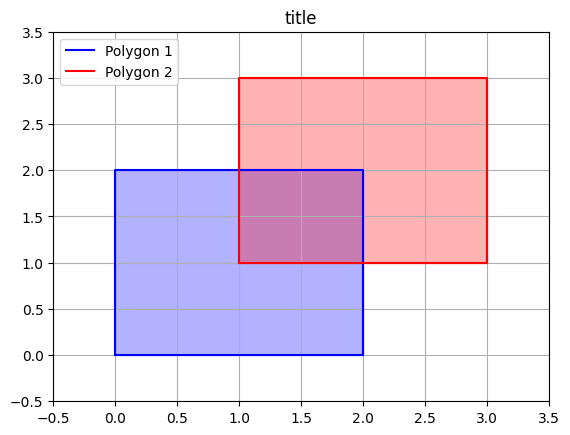

In [57]:
fig, ax = plt.subplots()

ax.plot(x1, y1, 'b-', label='Polygon 1')
ax.fill(x1, y1, alpha=0.3, color='blue')
ax.plot(x2, y2, 'r-', label='Polygon 2')
ax.fill(x2, y2, alpha=0.3, color='red')
ax.set_title('title')
ax.grid(True)
ax.legend()
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.5, 3.5)

array('d', [2.0, 2.0, 1.0, 1.0, 2.0]) array('d', [2.0, 1.0, 1.0, 2.0, 2.0])


(-0.5, 3.5)

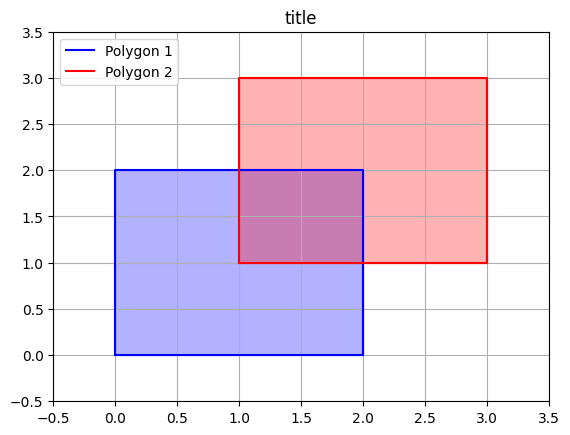

In [58]:
intersection = polygon1.intersection(polygon2)
x, y = intersection.exterior.xy
print(x, y)


fig, ax = plt.subplots()

ax.plot(x1, y1, 'b-', label='Polygon 1')
ax.fill(x1, y1, alpha=0.3, color='blue')
ax.plot(x2, y2, 'r-', label='Polygon 2')
ax.fill(x2, y2, alpha=0.3, color='red')
ax.set_title('title')
ax.grid(True)
ax.legend()
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.5, 3.5)

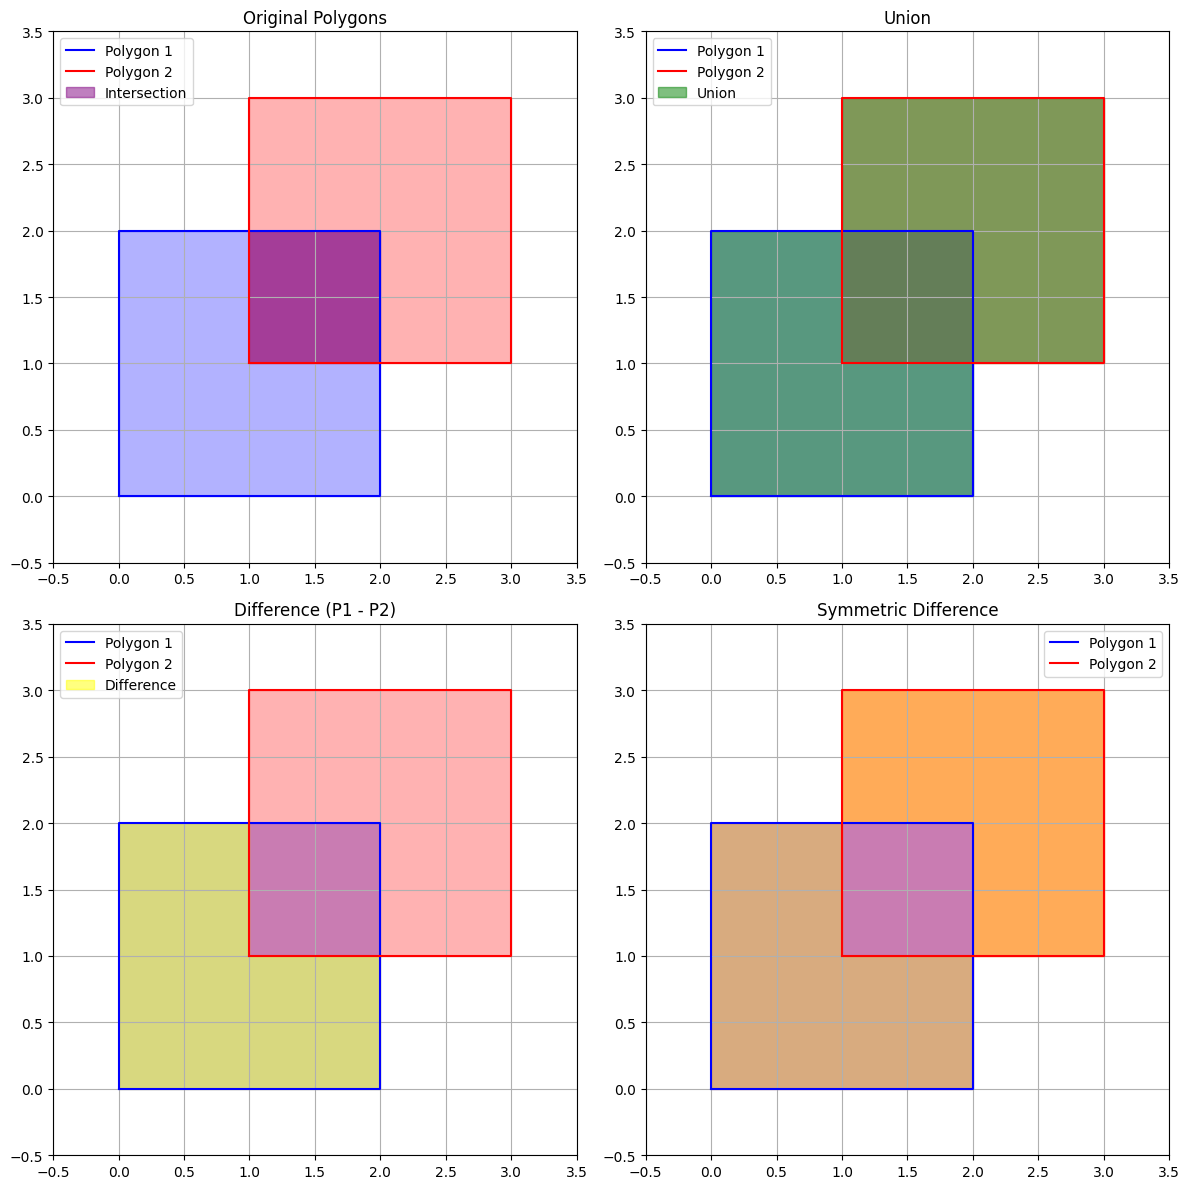

In [59]:
# 공간 연산 결과를 시각화하기 위한 서브플롯 생성
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

# 원본 폴리곤 시각화
x1, y1 = polygon1.exterior.xy
x2, y2 = polygon2.exterior.xy

def plot_polygons(ax, title):
    ax.plot(x1, y1, 'b-', label='Polygon 1')
    ax.fill(x1, y1, alpha=0.3, color='blue')
    ax.plot(x2, y2, 'r-', label='Polygon 2')
    ax.fill(x2, y2, alpha=0.3, color='red')
    ax.set_title(title)
    ax.grid(True)
    ax.legend()
    ax.set_xlim(-0.5, 3.5)
    ax.set_ylim(-0.5, 3.5)

# 교집합 (Intersection)
intersection = polygon1.intersection(polygon2)
plot_polygons(ax1, 'Original Polygons')
x, y = intersection.exterior.xy
ax1.fill(x, y, alpha=0.5, color='purple', label='Intersection')
ax1.legend()

# 합집합 (Union)
union = polygon1.union(polygon2)
plot_polygons(ax2, 'Union')
x, y = union.exterior.xy
ax2.fill(x, y, alpha=0.5, color='green', label='Union')
ax2.legend()

# 차집합 (Difference)
difference = polygon1.difference(polygon2)
plot_polygons(ax3, 'Difference (P1 - P2)')
x, y = difference.exterior.xy
ax3.fill(x, y, alpha=0.5, color='yellow', label='Difference')
ax3.legend()

# 대칭차집합 (Symmetric Difference)
sym_difference = polygon1.symmetric_difference(polygon2)
plot_polygons(ax4, 'Symmetric Difference')
if sym_difference.geom_type == 'MultiPolygon':
    for geom in sym_difference.geoms:
        x, y = geom.exterior.xy
        ax4.fill(x, y, alpha=0.5, color='orange')
else:
    x, y = sym_difference.exterior.xy
    ax4.fill(x, y, alpha=0.5, color='orange')
ax4.legend()

plt.tight_layout()
plt.show()

## 측정 및 거리 분석

- 거리 계산, 면적 계산, 길이 계산,

In [61]:
polygon = Polygon([(0,0), (1,1), (2,2)])
linestring = LineString([(0,0), (1,1)])
point = Point(0.5, 0.5)


# 1. 거리 계산
p1 = Point(0,0)
p2 = Point(2,3)
distance = p1.distance(p2)
print(distance)


3.605551275463989


14.0


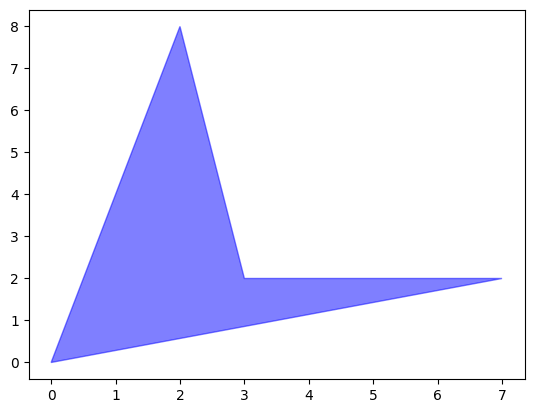

In [74]:
# 2. 면적 계산

square = Polygon([(0, 0), (2, 8), (3, 2), (7, 2)])
area = square.area
print(area)

fig, ax = plt.subplots()
ax.fill(square.exterior.xy[0], square.exterior.xy[1],alpha = 0.5 ,color='blue')
plt.show()

151.94528867218816


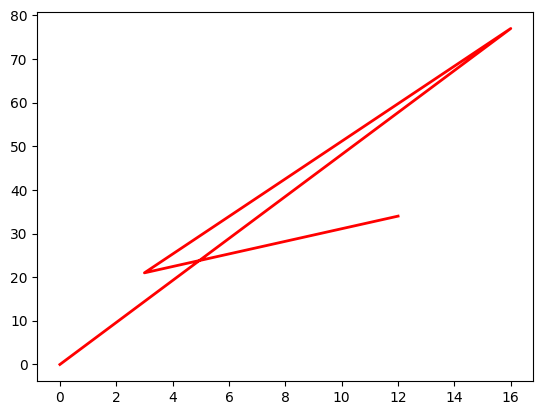

In [68]:
# 3. 길이 계산

line = LineString([(0,0), (16,77), (3,21), (12,34)])
length = line.length
print(length)

x, y = line.xy

fig, ax = plt.subplots()
ax.plot(x,y,'r-', linewidth = 2)
plt.show()

POINT (2.142857142857143 2.761904761904762)


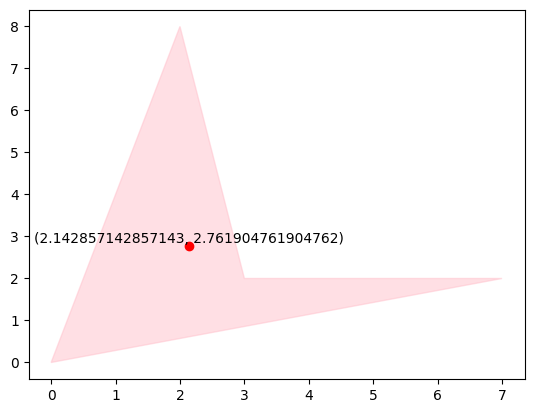

In [75]:
# 중심점 찾기

polygon = Polygon([(0, 0), (2, 8), (3, 2), (7, 2)])
centroid = polygon.centroid
print(centroid)

x, y = polygon.exterior.xy
fig, ax = plt.subplots()
ax.fill(x, y, alpha = 0.5, color = 'pink')
ax.plot(centroid.x, centroid.y, 'ro', label = 'Centroid')
ax.text(centroid.x, centroid.y + 0.1, f'({centroid.x}, {centroid.y})', ha = 'center')
plt.show()

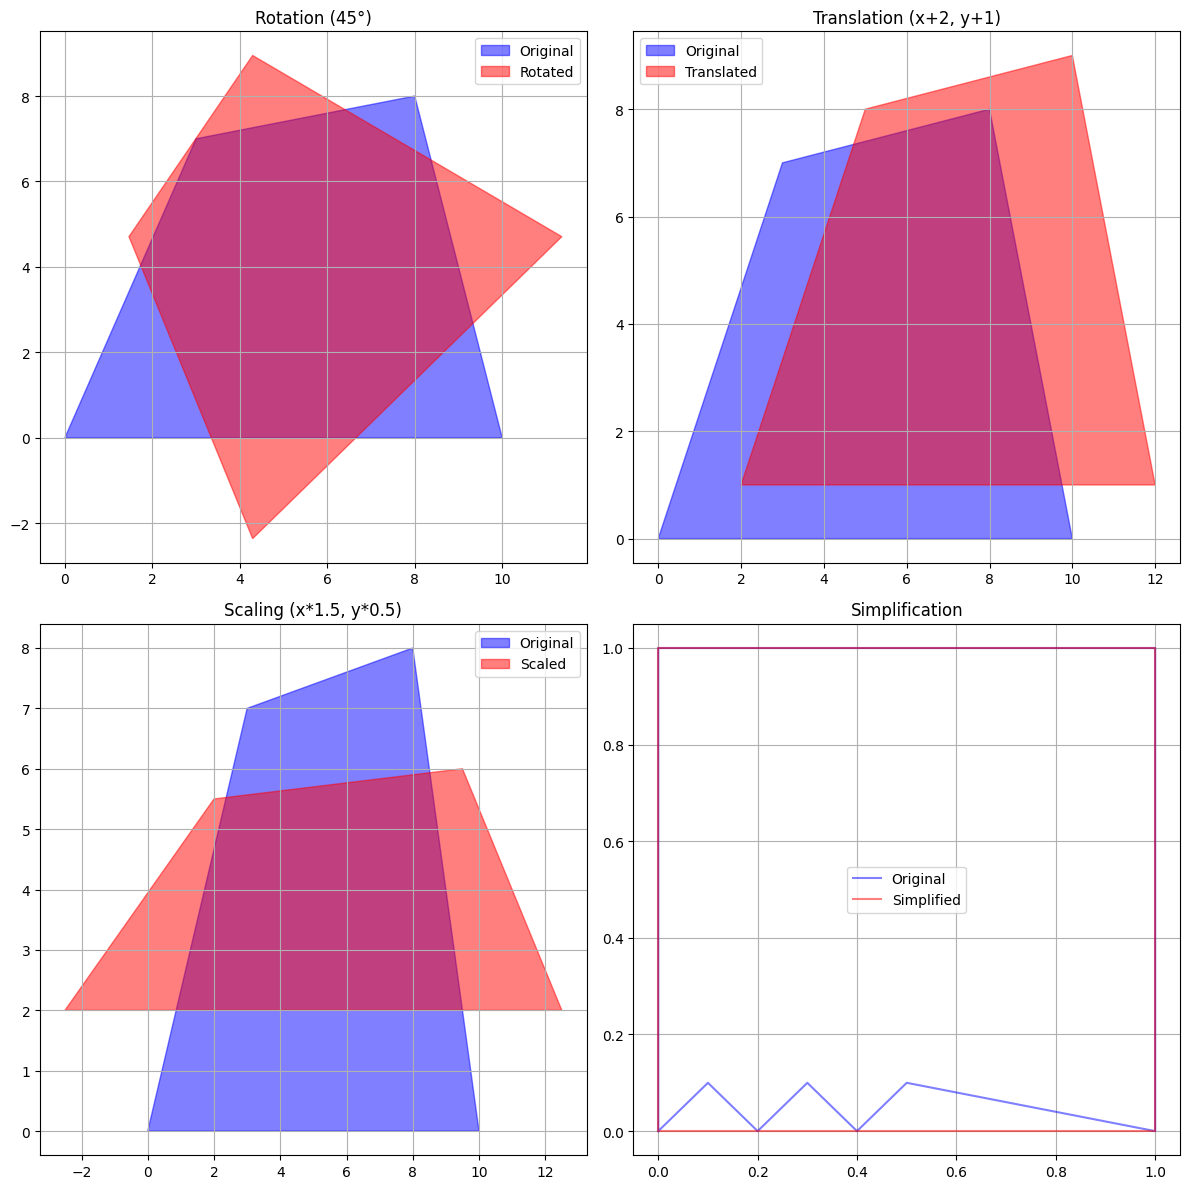

In [81]:
from shapely import affinity

# 기하학적 변환 예제를 위한 기본 다각형 생성
base_polygon = Polygon([(0, 0), (3, 7), (8,8), (10, 0)])

# 서브플롯 생성
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

# 1. 회전 (Rotation)
rotation_angle = 45  # 45도 회전
rotated = affinity.rotate(base_polygon, rotation_angle, origin='center')

x, y = base_polygon.exterior.xy
ax1.fill(x, y, alpha=0.5, color='blue', label='Original')
x, y = rotated.exterior.xy
ax1.fill(x, y, alpha=0.5, color='red', label='Rotated')
ax1.set_title('Rotation (45°)')
ax1.grid(True)
ax1.legend()

# 2. 이동 (Translation)
translated = affinity.translate(base_polygon, xoff=2, yoff=1)

x, y = base_polygon.exterior.xy
ax2.fill(x, y, alpha=0.5, color='blue', label='Original')
x, y = translated.exterior.xy
ax2.fill(x, y, alpha=0.5, color='red', label='Translated')
ax2.set_title('Translation (x+2, y+1)')
ax2.grid(True)
ax2.legend()

# 3. 축소/확대 (Scaling)
scaled = affinity.scale(base_polygon, xfact=1.5, yfact=0.5)

x, y = base_polygon.exterior.xy
ax3.fill(x, y, alpha=0.5, color='blue', label='Original')
x, y = scaled.exterior.xy
ax3.fill(x, y, alpha=0.5, color='red', label='Scaled')
ax3.set_title('Scaling (x*1.5, y*0.5)')
ax3.grid(True)
ax3.legend()

# 4. 단순화 (Simplification)
# 복잡한 다각형 생성
complex_coords = [(0, 0), (0.1, 0.1), (0.2, 0), (0.3, 0.1), 
                 (0.4, 0), (0.5, 0.1), (1, 0), (1, 1), (0, 1)]
complex_polygon = Polygon(complex_coords)
simplified = complex_polygon.simplify(0.2)

x, y = complex_polygon.exterior.xy
ax4.plot(x, y, 'b-', label='Original', alpha=0.5)
x, y = simplified.exterior.xy
ax4.plot(x, y, 'r-', label='Simplified', alpha=0.5)
ax4.set_title('Simplification')
ax4.grid(True)
ax4.legend()

plt.tight_layout()
plt.show()